In [295]:
#packages
import gensim
import os
import smart_open
import pickle
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Data directories

tweets_dir = os.listdir("dataverse_files/Tweets/")

N_tweets_dir = [txt for txt in tweets_dir if txt[0]=='N']
R_tweets_dir = [txt for txt in tweets_dir if txt[0]=='R']

user_info_dir = "dataverse_files/sub_user_info_share.txt"

In [3]:
def read_corpus(file, tokens_only=False):
    with smart_open.smart_open("dataverse_files/Tweets/"+file) as f:
        for i, line in enumerate(f):
            if tokens_only:
                yield gensim.utils.simple_preprocess(line)
            else:
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [41]:
N_tweets = pd.read_pickle("N_tweets_dataframe.pkl")
R_tweets = pd.read_pickle("R_tweets_dataframe.pkl")

In [42]:
N_tweets.head()

,userid,tweetid,content,time,topic
0,5837040,2205136359,Three more arrests in Vanessa George child por...,2009-06-17 11:02:46,N_Vanessa
1,38384087,2128965617,OMFFG Senator Ted Kennedy is Vanessa George Bu...,2009-06-12 08:11:57,N_Vanessa
2,26282884,2108680927,just listening to the news about the nursery w...,2009-06-10 21:34:44,N_Vanessa
3,56013357,2104767069,Pornograf237a infantil y penetraciones en una ...,2009-06-10 16:00:24,N_Vanessa
4,45344579,2129943277,PS i was talking about that bitch vanessa geo...,2009-06-12 11:02:36,N_Vanessa


In [321]:
R_tweets.content[30]

'Earwigs please dont eat my brain'

In [53]:
def read_corpus(dataframe, tokens_only=False):
    for i in range(len(dataframe)):
        try:
            if tokens_only:
                yield gensim.utils.simple_preprocess(dataframe.content[i])
            else:
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(dataframe.content[i]), [dataframe.topic[i]])
        except:
            pass

In [55]:
N_corpus = list(read_corpus(N_tweets))
R_corpus = list(read_corpus(R_tweets))

In [159]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs =10)
model.build_vocab(N_corpus+R_corpus)

In [160]:
%time model.train(N_corpus+R_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 2min 35s, sys: 35.5 s, total: 3min 10s
Wall time: 1min 47s


In [161]:
model.docvecs.index2entity[3]

'N_ElephantPaint'

In [162]:
model.docvecs['N_Airfrance']

array([ 1.9482682 ,  0.84259284, -1.1136866 , -0.30294627, -0.0702703 ,
       -0.10671705, -0.24841633, -0.07175862,  0.6575503 ,  0.584801  ,
       -0.6468602 ,  0.33965358,  0.95874494, -0.96384025, -0.3647291 ,
        2.0137198 ,  2.142517  , -0.15448615, -0.5441879 , -0.06083747,
       -0.7122725 , -0.2226752 ,  1.5261683 ,  1.2134268 , -0.47980604,
       -0.8044541 ,  0.5323824 , -0.1722735 ,  0.60198605, -0.4920465 ,
       -0.6925089 , -0.6912949 , -1.2494015 , -1.1917428 , -0.13849868,
       -1.6553929 ,  0.37579313, -0.25181383, -0.11544284,  1.0703179 ,
        0.127798  , -0.05220362,  0.8751279 ,  0.752693  ,  0.04632359,
        0.9787782 ,  0.36860955, -1.4861813 ,  0.525348  , -0.15751015,
       -0.9634477 ,  1.4388506 , -0.8188621 ,  0.12819016, -0.63237894,
       -0.56616884, -0.45041642,  1.3178449 ,  1.1988677 ,  1.3736665 ,
       -1.5970736 , -1.1402053 , -0.19445032,  1.6701226 , -1.0819677 ,
       -0.35492465,  1.2749417 ,  0.52559704,  1.0159062 , -0.25

In [125]:
model.docvecs.most_similar('N_Airliner')

[('N_Airfrance', 0.8036577701568604),
 ('N_Turkishcrash', 0.6748895645141602),
 ('R_DennisKucinichUFO', 0.6288846731185913),
 ('N_EmmaWatsonMagazine', 0.6242344975471497),
 ('R_emmaWatson', 0.6158970594406128),
 ('R_SodaCanRatUrine', 0.6139122843742371),
 ('N_Giantcoconutcrab', 0.5911755561828613),
 ('R_ListerineMosquito', 0.5879295468330383),
 ('N_Vince', 0.5782210826873779),
 ('R_jeffGoldblum', 0.5767196416854858)]

In [163]:
model.docvecs.most_similar_to_given('N_Airfrance',['R_jeffGoldblum','N_Giantcoconutcrab'])

'R_jeffGoldblum'

In [164]:
model['apple']

array([ 1.3547655 ,  0.07136398, -0.45036408, -0.3311548 ,  0.98920083,
        0.05176482,  0.09993839, -0.5378894 ,  1.0017928 , -1.0350873 ,
        0.88301563, -0.424657  , -0.42784455, -0.23268501, -0.41910833,
       -0.15176639, -0.17334804, -0.22842085,  0.11999387, -1.0399194 ,
       -0.87556684, -0.4058722 ,  1.047768  ,  0.5607798 , -0.73117197,
       -0.14044443,  0.71769583, -0.1024855 , -0.7411554 ,  0.25268948,
       -1.8265134 , -0.83231753, -0.406524  , -0.35435128,  0.02420194,
       -0.29158556,  0.5766957 ,  0.23723856,  0.33682117,  0.02325873,
        0.19581312,  0.34764624, -0.104836  , -0.07934648,  0.33927226,
        0.26153708,  1.0251607 , -0.58213085, -0.55233634, -0.21089795,
       -0.18560863, -0.7693935 , -0.6023176 ,  0.10246115,  0.88725704,
       -0.29867524, -0.27185228, -0.57513577, -0.20473963,  0.3404943 ,
       -0.40659434, -0.06219149,  0.12432563,  0.29439554,  0.4716145 ,
       -0.25869733, -0.39964384, -0.41746336,  0.36356142,  0.61

In [167]:
model.docvecs.most_similar('N_Airfrance')

[('N_Airliner', 0.7835520505905151),
 ('R_SpermBank', 0.7040725946426392),
 ('N_Vince', 0.6703787446022034),
 ('R_DennisKucinichUFO', 0.6377615332603455),
 ('R_SodaCanRatUrine', 0.6322298049926758),
 ('N_Cristiano', 0.6231027245521545),
 ('R_SushiBrainWorm', 0.6220572590827942),
 ('R_Hercules', 0.6204385161399841),
 ('R_hydrogen', 0.6026579141616821),
 ('R_Earwig', 0.60157310962677)]

In [322]:
inferred = model.infer_vector('Earwigs please dont eat my brain')
sims = model.docvecs.most_similar([inferred])

In [323]:
sims

[('N_Vanessa', 0.09639602899551392),
 ('R_alligator', 0.0643489882349968),
 ('N_JayceeDugard', 0.06343191862106323),
 ('N_BeefProtest', 0.055560771375894547),
 ('N_ByrdBillings', 0.04774774610996246),
 ('N_SarahJessicaSurrogate', 0.04500551521778107),
 ('R_Chupacabra', 0.04058702290058136),
 ('R_KoreanFanDeath', 0.03735163435339928),
 ('N_Airfrance', 0.025352707132697105),
 ('R_PepsiAIDS', 0.02406071126461029)]

In [232]:
list(model.docvecs.doctags.items())[50][0][0]

'N'

In [188]:
model.docvecs.vectors_docs.shape

(111, 300)

In [289]:
viz_words = 1000

topic_list = list(model.docvecs.doctags.items())
word_vector=model.docvecs.vectors_docs[:]
tsne = TSNE(n_components=3)
embed_tsne = tsne.fit_transform(word_vector)

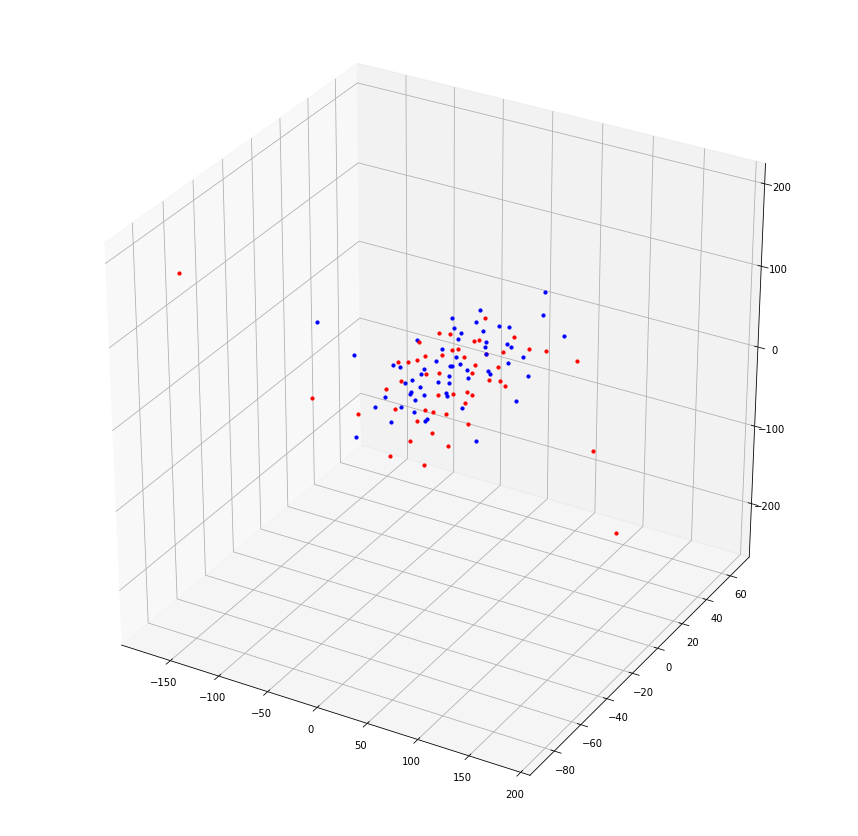

In [312]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(embed_tsne)):
    if topic_list[i][0][0]=='N':
        plt.scatter(embed_tsne[i][2], embed_tsne[i][1],zs=embed_tsne[i][0],zdir='z',s=10,c='r')
        #plt.annotate(topic_list[i][0],(embed_tsne[i,0], embed_tsne[i,1]),fontsize=7)
    else:
        plt.scatter(embed_tsne[i,2],embed_tsne[i,1],zs=embed_tsne[i,0],s=10,c='b')
        #plt.annotate(topic_list[i][0],(embed_tsne[i,0], embed_tsne[i,1]),fontsize=7)